# Formativo 1

In [2]:
import os 
import pandas as pd
import numpy as np
import glob
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use('default')
  
# %matplotlib inline: only draw static
# images in the notebookº
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
laliga2122 = pd.read_excel('datos_liga/LaLiga21 22.xlsx', )
laliga2021 = pd.read_excel('datos_liga/LaLiga20 21.xlsx', )
laliga1920 = pd.read_excel('datos_liga/LaLiga19 20.xlsx', )
laliga1819 = pd.read_excel('datos_liga/LaLiga18 19.xlsx', )
laliga1718 = pd.read_excel('datos_liga/LaLiga17 18.xlsx', )
laliga1617 = pd.read_excel('datos_liga/LaLiga16 17.xlsx', )

In [4]:
laliga = laliga2122.dropna(how='all').append(laliga2021.dropna(how='all')
).append(laliga1920.dropna(how='all')).append(laliga1819.dropna(how='all')
).append(laliga1718.dropna(how='all')).append(laliga1617.dropna(how='all')).loc[:,
['Wk','Date','Local','Score','Visitante', 'Attendance']]


laliga['Attendance']= laliga['Attendance']*1000
laliga['Torneo'] = 'Primera división'

In [5]:
partidos6t = pd.concat([laliga],axis = 0)
partidos6t

,Wk,Date,Local,Score,Visitante,Attendance,Torneo
0,1.0,2021-08-13,Valencia,1–0,Getafe,9868.0,Primera división
1,1.0,2021-08-14,Cádiz,1–1,Levante,6941.0,Primera división
2,1.0,2021-08-14,Mallorca,1–1,Betis,6279.0,Primera división
3,1.0,2021-08-14,Osasuna,0–0,Espanyol,6715.0,Primera división
4,1.0,2021-08-14,Alavés,1–4,Real Madrid,3968.0,Primera división
...,...,...,...,...,...,...,...
415,38.0,2017-05-21,Valencia,1–3,Villarreal,33587.0,Primera división
416,38.0,2017-05-21,Atlético Madrid,3–1,Athletic Club,52314.0,Primera división
417,38.0,2017-05-21,Celta Vigo,2–2,Real Sociedad,14188.0,Primera división
418,38.0,2017-05-21,Barcelona,4–2,Eibar,74932.0,Primera división


In [6]:
def golesvisita(marcador):
    goles = marcador.split('–')
    return int(goles[1])

def goleslocal(marcador):
    goles = marcador.split('–')
    return int(goles[0])

partidos6t['Goles Local'] = partidos6t['Score'].apply(goleslocal)
partidos6t['Goles Visitante'] = partidos6t['Score'].apply(golesvisita)
partidos6t['Total goles partido']= partidos6t['Goles Local']+partidos6t['Goles Visitante']

In [7]:
def torneo(año,mes):
    if ((año==2016) & (mes<=12)|(año==2017) & (mes<8)):
        return '16/17'
    elif ((año==2017) & (mes<=12)|(año==2018) & (mes<8)):
        return '17/18'
    elif ((año==2018) & (mes<=12)|(año==2019) & (mes<8)):
        return '18/19'
    elif ((año==2019) & (mes<=12)|(año==2020) & (mes<9)):
        return '19/20'
    elif ((año==2020) & (mes<=12)|(año==2021) & (mes<8)):
        return '20/21'
    elif ((año==2021) & (mes<=12)|(año==2022) & (mes<8)):
        return '21/22'

    
partidos6t['Año'] = partidos6t['Date'].dt.year
partidos6t['Mes'] = partidos6t['Date'].dt.month
partidos6t['Temporada'] = partidos6t.apply(lambda x: torneo(x['Año'],x['Mes']),axis = 1)

In [8]:
def resultado(string):
    goles = string.split('–')
    if int(goles[0])>int(goles[1]):
        return 'Local'
    if int(goles[0])<int(goles[1]):
        return 'Visitante'
    else: 
        return 'Empate'
    
def resultado_equipo(string, local, visita):
    goles = string.split('–')
    if int(goles[0])>int(goles[1]):
        return local
    if int(goles[0])<int(goles[1]):
        return visita
    else: 
        return 'Empate'
    
partidos6t['Resultado'] = partidos6t['Score'].apply(resultado)
partidos6t['Ganador'] = partidos6t.apply(lambda x: resultado_equipo(x['Score'],x['Local'],x['Visitante']),axis=1)

In [9]:
ej2122 = partidos6t[(partidos6t['Temporada']=='21/22')&(partidos6t['Torneo']=='Primera división')]
equip2122 = ej2122['Local'].unique().tolist()

In [10]:
def tabla_posicion(data,fecha,equipos):
    tabla = {}
    for equipo in equipos:
        data_usar = data[(data['Wk']<=fecha)&((data['Local']==equipo)|(data['Visitante']==equipo))]
        puntos = 0
        for i in range(len(data_usar)):
            ganador = str(data_usar.iloc[i]['Ganador'])
            if ganador == equipo:
                puntos += 3
            if ganador == 'Empate':
                puntos +=1
        tabla[equipo] = puntos
    df = pd.DataFrame([[key, tabla[key]] for key in tabla.keys()], columns=['Equipo', 'Puntos'])
    df = df.sort_values(by='Puntos',ascending = False).reset_index()
    return df[['Equipo','Puntos']]

In [11]:
tabla_33 = tabla_posicion(ej2122,35,equip2122)
tabla_33

,Equipo,Puntos
0,Real Madrid,81
1,Barcelona,69
2,Sevilla,65
3,Atlético Madrid,64
4,Betis,58
5,Real Sociedad,56
6,Villarreal,53
7,Athletic Club,52
8,Osasuna,46
9,Valencia,44


In [12]:
def tabla_posicion2(data,fecha,equipos,eq):
    tabla = {}
    for equipo in equipos:
        data_usar = data[(data['Wk']<=fecha)&((data['Local']==equipo)|(data['Visitante']==equipo))]
        puntos = 0
        for i in range(len(data_usar)):
            ganador = str(data_usar.iloc[i]['Ganador'])
            if ganador == equipo:
                puntos += 3
            if ganador == 'Empate':
                puntos +=1
        tabla[equipo] = puntos
    df = pd.DataFrame([[key, tabla[key]] for key in tabla.keys()], columns=['Equipo', 'Puntos'])
    df = df.sort_values(by='Puntos',ascending = False).reset_index()
    df = df[['Equipo','Puntos']]
    pos = df[df['Equipo']==eq].index.values[0]
    return pos+1

In [13]:
fechas = sorted(ej2122['Wk'].unique().tolist())

In [56]:
equipos = ej2122['Local'].unique().tolist()

In [30]:
equipo = 'Betis'
fecha = 5

In [68]:
posiciones = []
for fec in fechas:
    pos = tabla_posicion2(ej2122,fec,equip2122,equipo)
    posiciones.append(pos)
    if fec == fecha:
        break

In [69]:
posiciones

[15, 15, 17, 11, 13]

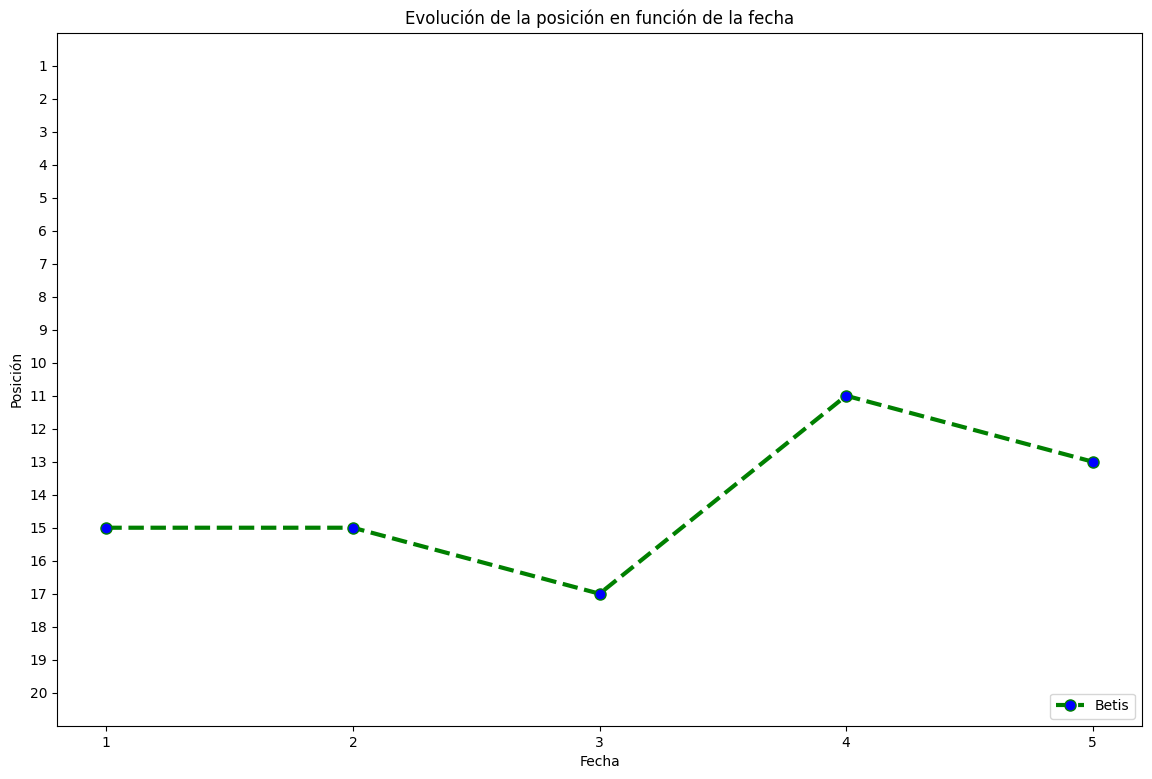

In [71]:
fig,ax = plt.subplots(figsize=(14, 9))

ax.plot(fechas[:fecha], posiciones, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=8, label = equipo)
ax.set_title('Evolución de la posición en función de la fecha')
ax.set_ylabel('Posición')
ax.set_xlabel('Fecha')
plt.legend()
plt.ylim(0,21)
plt.xticks(range(1,fecha+1,1))
plt.yticks(range(1,21,1))
ax.invert_yaxis()
plt.legend([equipo], loc='lower right')
plt.show()

---
# Formativo 1

# P1

In [78]:
fecha = 38

In [83]:
def get_positions_history(team, date, teams, data):
    positions = []
    for fec in fechas:
        pos = tabla_posicion2(data,fec,teams,team)
        positions.append(pos)
        if fec == date:
            break

    return positions

In [123]:
from random import sample

def plot_positions(dates, date, positions):
    fig,ax = plt.subplots(figsize=(14, 9))
    teams = list(positions.keys())
    colors = ['green', 'red', 'orange', 'blue', 'black']

    for team, positions in positions.items():
        color = sample(colors, 1)[0]
        print(color, colors)
        colors.remove(color)
        ax.plot(dates[:date], positions, color=color, linestyle='dashed', linewidth = 3,
                marker='o', markerfacecolor='blue', markersize=8, label = team)
    #ax.plot(fechas[:fecha], posiciones_sevilla, color='red', linestyle='dashed', linewidth = 3,
    #        marker='o', markerfacecolor='orange', markersize=8, label = 'Sevilla')
    ax.set_title('Evolución de la posición en función de la fecha')
    ax.set_ylabel('Posición')
    ax.set_xlabel('Fecha')
    plt.legend()
    plt.ylim(0,21)
    plt.xticks(range(1,date+1,1))
    plt.yticks(range(1,21,1))
    ax.invert_yaxis()
    plt.legend(teams, loc='lower right')
    plt.show()

In [129]:
until_date = 23
teams = ['Espanyol', 'Elche', 'Getafe']

positions = {team: get_positions_history(team, until_date, equip2122, ej2122) for team in teams}

blue ['green', 'red', 'orange', 'blue', 'black']
black ['green', 'red', 'orange', 'black']
red ['green', 'red', 'orange']


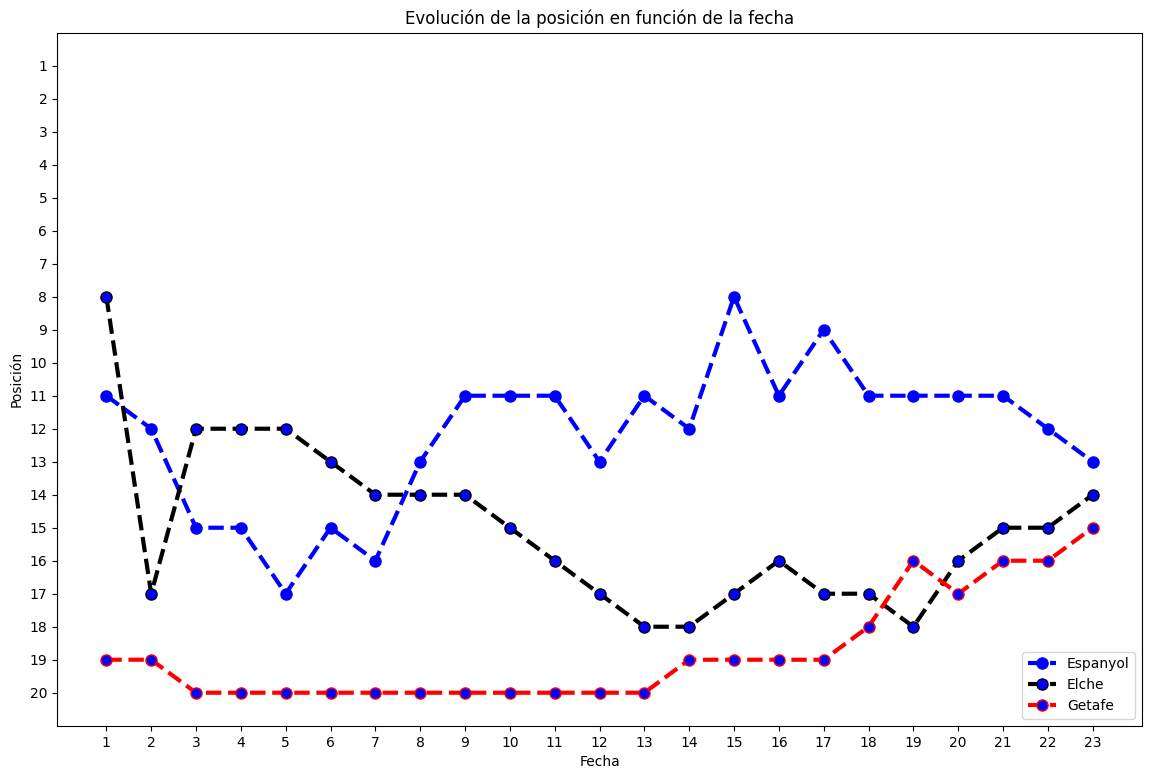

In [130]:
plot_positions(fechas, until_date, positions)

---
# Sumativo

In [134]:
escuelas = pd.read_excel('datos_liga/QS4.xlsx', sheet_name='Escuelas')
escuelas

,Escuela,Ubicación en x,Ubicación en y,Tipo,Cantidad de estudiantes
0,Escuela 1,93,63,Básica,507
1,Escuela 2,54,80,Completa,1120
2,Escuela 3,72,28,Media,519
3,Escuela 4,16,14,Media,829
4,Escuela 5,6,86,Completa,727
5,Escuela 6,24,7,Completa,996
6,Escuela 7,99,83,Básica,518
7,Escuela 8,89,22,Básica,1080
8,Escuela 9,63,57,Completa,930
9,Escuela 10,30,55,Completa,723


In [135]:
furgones = pd.read_excel('datos_liga/QS4.xlsx', sheet_name='Furgones')
furgones

,Furgón,Escuela a la que pertenece,Capacidad del furgón,Costo transporte alumno/año [MM$]
0,Furgón 1,Escuela 15,30,0.008
1,Furgón 2,Escuela 7,35,0.007
2,Furgón 3,Escuela 8,35,0.007
3,Furgón 4,Escuela 10,20,0.008
4,Furgón 5,Escuela 13,35,0.009
...,...,...,...,...
70,Furgón 71,Escuela 15,20,0.008
71,Furgón 72,Escuela 20,30,0.006
72,Furgón 73,Escuela 16,20,0.006
73,Furgón 74,Escuela 16,30,0.004


# P1

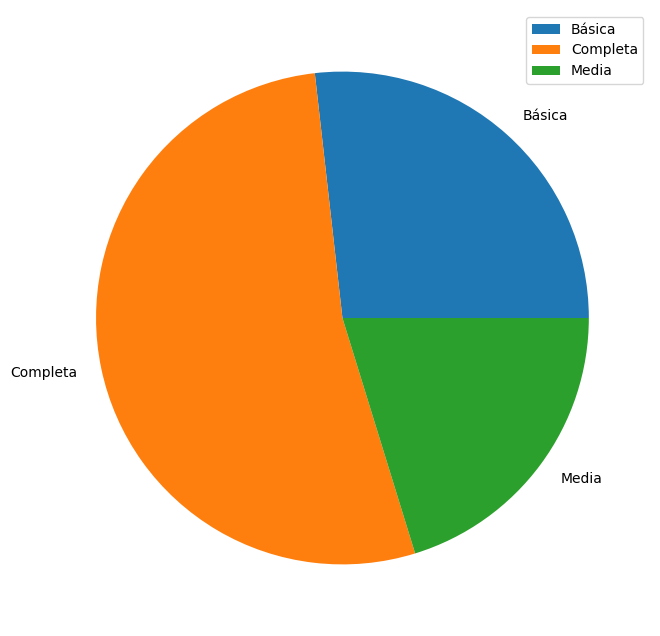

In [142]:
escuelas[['Tipo','Cantidad de estudiantes']].groupby('Tipo').sum().plot.pie(y='Cantidad de estudiantes', figsize = (8,8))
plt.ylabel('')
plt.show()

# P2

In [145]:
p2 = furgones[['Furgón', 'Escuela a la que pertenece']].groupby('Escuela a la que pertenece').count()
p2


,Furgón
Escuela a la que pertenece,
Escuela 1,1
Escuela 10,3
Escuela 11,5
Escuela 12,7
Escuela 13,2
Escuela 14,3
Escuela 15,8
Escuela 16,2
Escuela 17,2


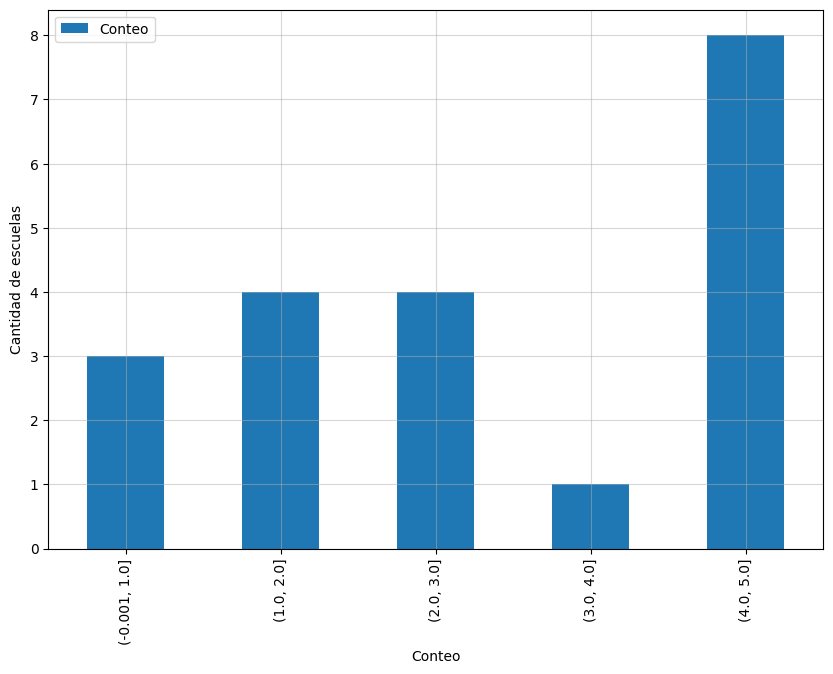

In [146]:
p2 = furgones[['Furgón', 'Escuela a la que pertenece']].groupby('Escuela a la que pertenece').count()
p2['Conteo'] = p2.apply(lambda row: row.Furgón if row.Furgón < 5 else 5, axis = 1)
p2.groupby([pd.cut(p2["Conteo"], np.arange(0, 6, 1), include_lowest = True)]).count().plot(y = 'Conteo', kind='bar', figsize = (10,7))
plt.ylabel('Cantidad de escuelas')
plt.grid(alpha = 0.5)
plt.show()

In [147]:
p2.groupby([pd.cut(p2["Conteo"], np.arange(0, 6, 1), include_lowest = True)]).count()

,Furgón,Conteo
Conteo,,
"(-0.001, 1.0]",3,3
"(1.0, 2.0]",4,4
"(2.0, 3.0]",4,4
"(3.0, 4.0]",1,1
"(4.0, 5.0]",8,8


In [148]:
p2

,Furgón,Conteo
Escuela a la que pertenece,,
Escuela 1,1,1
Escuela 10,3,3
Escuela 11,5,5
Escuela 12,7,5
Escuela 13,2,2
Escuela 14,3,3
Escuela 15,8,5
Escuela 16,2,2
Escuela 17,2,2


# P3

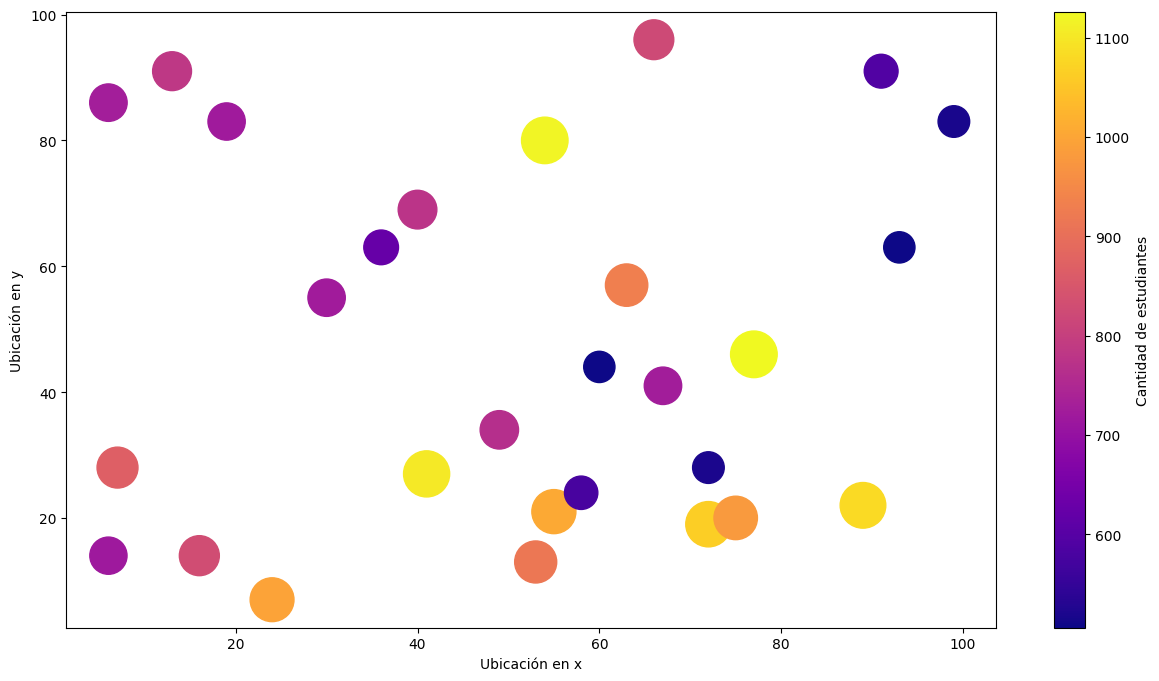

In [153]:
escuelas.plot.scatter(x='Ubicación en x', y='Ubicación en y', s='Cantidad de estudiantes', c = 'Cantidad de estudiantes', colormap = 'plasma', figsize = (15,8))
plt.show()

# P4

In [154]:
furgones

,Furgón,Escuela a la que pertenece,Capacidad del furgón,Costo transporte alumno/año [MM$]
0,Furgón 1,Escuela 15,30,0.008
1,Furgón 2,Escuela 7,35,0.007
2,Furgón 3,Escuela 8,35,0.007
3,Furgón 4,Escuela 10,20,0.008
4,Furgón 5,Escuela 13,35,0.009
...,...,...,...,...
70,Furgón 71,Escuela 15,20,0.008
71,Furgón 72,Escuela 20,30,0.006
72,Furgón 73,Escuela 16,20,0.006
73,Furgón 74,Escuela 16,30,0.004


In [155]:
furgones.columns = ['Furgón', 'Escuela_pertenece', 'Capacidad', 'Costo_alumno_año']

In [157]:
furgones['Costo_total'] = furgones.apply(lambda row: row.Capacidad*row.Costo_alumno_año, axis = 1)
furgones

,Furgón,Escuela_pertenece,Capacidad,Costo_alumno_año,Costo_total
0,Furgón 1,Escuela 15,30,0.008,0.240
1,Furgón 2,Escuela 7,35,0.007,0.245
2,Furgón 3,Escuela 8,35,0.007,0.245
3,Furgón 4,Escuela 10,20,0.008,0.160
4,Furgón 5,Escuela 13,35,0.009,0.315
...,...,...,...,...,...
70,Furgón 71,Escuela 15,20,0.008,0.160
71,Furgón 72,Escuela 20,30,0.006,0.180
72,Furgón 73,Escuela 16,20,0.006,0.120
73,Furgón 74,Escuela 16,30,0.004,0.120


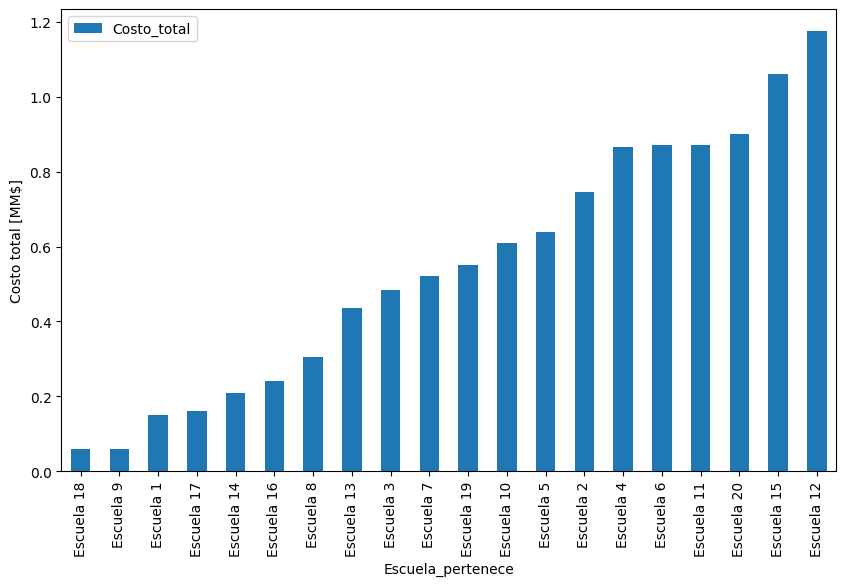

In [158]:
furgones[['Escuela_pertenece', 'Costo_total']].groupby('Escuela_pertenece').sum().sort_values(by = 'Costo_total', ascending = True).plot(kind = 'bar', figsize = (10,6))
plt.ylabel('Costo total [MM$]')
plt.show()

# P5

In [172]:
p5 = furgones[['Capacidad', 'Escuela_pertenece']].groupby(['Escuela_pertenece', 'Capacidad']).sum().reset_index()
p5 = p5.groupby('Capacidad').count().reset_index()
fig = px.treemap(p5, path=['Capacidad', 'Escuela_pertenece'], values='Escuela_pertenece')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()